<a href="https://colab.research.google.com/github/YUCAVALCANTE/pythontips/blob/main/PyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

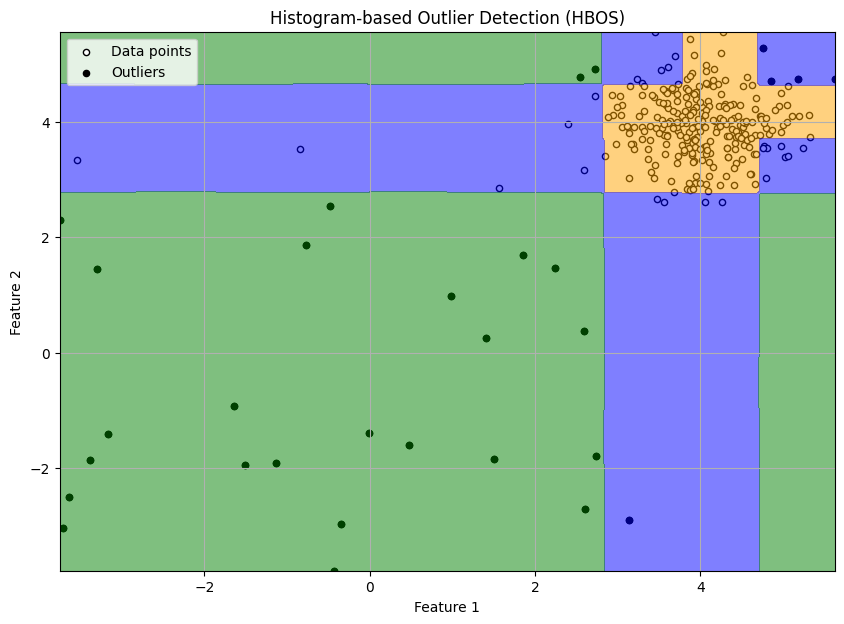

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.hbos import HBOS
from pyod.utils.data import generate_data

# Generate synthetic data
X, y = generate_data(n_train=300, train_only=True, n_features=2, contamination=0.1)

# Set up the HBOS model
hbos = HBOS()
hbos.fit(X)

# Compute the anomaly scores using the HBOS model
scores_pred = hbos.decision_function(X)

# Prediction of the outliers
y_pred = hbos.predict(X)

# Setup for visualization
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k', label='Data points')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='black', s=20, edgecolor='k', label='Outliers')

# Create a grid for the contour plot
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 200), np.linspace(X[:, 1].min(), X[:, 1].max(), 200))
Z = hbos.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define contour levels ensuring they are well separated and cover the range of Z
levels = np.linspace(Z.min(), Z.max(), 4)
if len(np.unique(levels)) > 1:
    plt.contourf(xx, yy, Z, levels=levels, colors=['orange', 'blue', 'green'], alpha=0.5)
else:
    print("Unable to create distinct contour levels from the decision function.")

plt.title('Histogram-based Outlier Detection (HBOS)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
